In [1]:
!pip install zenodo-get

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.1/128.1 kB 1.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:

from zenodo_get import zenodo_get
doi = '10.5281/zenodo.14025693'
files = zenodo_get([doi])


Title: Physical features for small sample of data (1000 events per class)
Keywords: 
Publication date: 2024-11-01
DOI: 10.5281/zenodo.14025693
Total size: 3.0 MB

Link: https://zenodo.org/records/14025693/files/1000_surface_physical_features.csv   size: 755.7 kB

Checksum is correct. (9a2c2643030cf058704d68e130654e9d)

Link: https://zenodo.org/records/14025693/files/1000_earthquakes_physical_features.csv   size: 754.4 kB

Checksum is correct. (28129c8dd1b3e14f655d489577b841b5)

Link: https://zenodo.org/records/14025693/files/1000_explosion_physical_features.csv   size: 751.5 kB

Checksum is correct. (af1342d32e163e961e043364136359b0)

Link: https://zenodo.org/records/14025693/files/1000_noise_physical_features.csv   size: 754.9 kB

Checksum is correct. (16cdb992fed6cf6273d5624f5df905da)
All files have been downloaded.


In [4]:
import pandas as pd
## loading features
f_eq = pd.read_csv('1000_earthquakes_physical_features.csv')
f_exp = pd.read_csv('1000_explosion_physical_features.csv')
f_su = pd.read_csv('1000_surface_physical_features.csv')
f_no = pd.read_csv('1000_noise_physical_features.csv')

In [9]:
# merge all data frames
f = pd.concat([f_eq, f_exp, f_su, f_no], ignore_index=True)

In [10]:
f.head()

,Unnamed: 0,Window_Length,RappMaxMean,RappMaxMedian,AsDec,KurtoSig,KurtoEnv,SkewSig,SkewEnv,CorPeakNumber,...,E_1_3,Kurto_1_3,E_3_10,Kurto_3_10,E_10_20,Kurto_10_20,E_20_50,Kurto_20_50,serial_no,source
0,0,40.0,4.963234,12.188437,4.552778,17.904832,0.894676,-0.845071,1.456111,277,...,-0.028841,6.718053,0.324643,15.115562,-0.126380,12.612282,0,0,0,earthquake
1,1,40.0,6.519167,29.072307,6.996000,20.703588,5.025331,-0.839831,2.328972,285,...,0.245433,16.161681,0.390336,17.077585,0.031499,3.831671,0,0,1,earthquake
2,2,40.0,3.140449,6.354157,2.282430,3.440429,-0.869952,-0.123130,0.717986,279,...,0.324953,2.748592,0.790635,4.132986,0.364318,4.550399,0,0,2,earthquake
3,3,40.0,4.095484,5.462582,1.073651,6.262027,0.324799,-0.208337,1.136656,287,...,0.494769,5.636661,0.628164,6.831651,0.244502,10.765435,0,0,3,earthquake
4,4,40.0,9.836379,40.660049,4.388140,23.809878,7.403890,0.387365,2.732907,289,...,-0.041484,24.936761,0.363402,26.860553,-0.244529,23.925487,0,0,5,earthquake


In [12]:
# remove missing values and nans
f = f.dropna(axis=1)
f.head()

,Unnamed: 0,Window_Length,RappMaxMean,RappMaxMedian,AsDec,KurtoSig,KurtoEnv,SkewSig,SkewEnv,CorPeakNumber,...,E_1_3,Kurto_1_3,E_3_10,Kurto_3_10,E_10_20,Kurto_10_20,E_20_50,Kurto_20_50,serial_no,source
0,0,40.0,4.963234,12.188437,4.552778,17.904832,0.894676,-0.845071,1.456111,277,...,-0.028841,6.718053,0.324643,15.115562,-0.126380,12.612282,0,0,0,earthquake
1,1,40.0,6.519167,29.072307,6.996000,20.703588,5.025331,-0.839831,2.328972,285,...,0.245433,16.161681,0.390336,17.077585,0.031499,3.831671,0,0,1,earthquake
2,2,40.0,3.140449,6.354157,2.282430,3.440429,-0.869952,-0.123130,0.717986,279,...,0.324953,2.748592,0.790635,4.132986,0.364318,4.550399,0,0,2,earthquake
3,3,40.0,4.095484,5.462582,1.073651,6.262027,0.324799,-0.208337,1.136656,287,...,0.494769,5.636661,0.628164,6.831651,0.244502,10.765435,0,0,3,earthquake
4,4,40.0,9.836379,40.660049,4.388140,23.809878,7.403890,0.387365,2.732907,289,...,-0.041484,24.936761,0.363402,26.860553,-0.244529,23.925487,0,0,5,earthquake


<Axes: xlabel='source'>

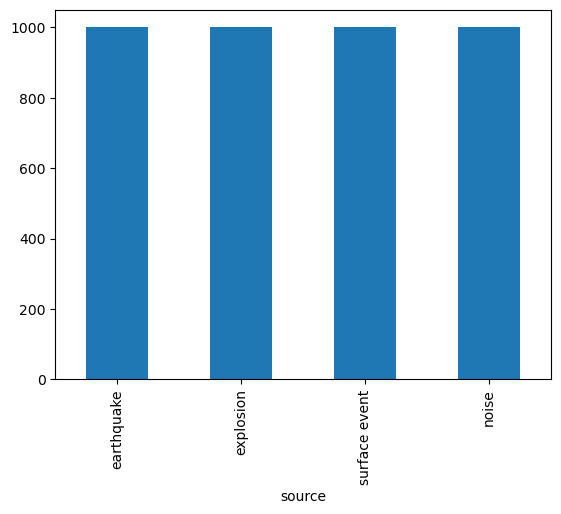

In [13]:
# exploratory evaluation, check the distribution of the target variable
f['source'].value_counts().plot(kind='bar')